# Correlation Determination - Single Team Level

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
# Loading our combined dataset
Merged_df = pd.read_excel('../HistoricalTrainingData/combinedTeamBoxScoreGameLogHistory.xlsx')

In [16]:
Merged_df = Merged_df[[
       'Team_Points',  'FTA', 'FT_Perc',
       'FG',  'ThreeP', 'ThreePA', 'ThreePA_Perc',
       'Offensive_Rebounds', 'Total_Rebounds', 'Assists', 'Steals', 'Blocks',
       'TurnOvers', 'Personal_Fouls', 'Offensive_EFG',
       'Defensive_EFG', 'Offensive_TurnOver_Rate', 'Defensive_TurnOver_Rate',
       'Offensive_Rebounding_Rate', 'Defensive_Rebounding_Rate',
       'OffensiveRating', 'DefensiveRating', 'Pace', 'FreeThrowAttemptRate',
       'ThreePointAttemptRate', 'TrueShootingRate']]

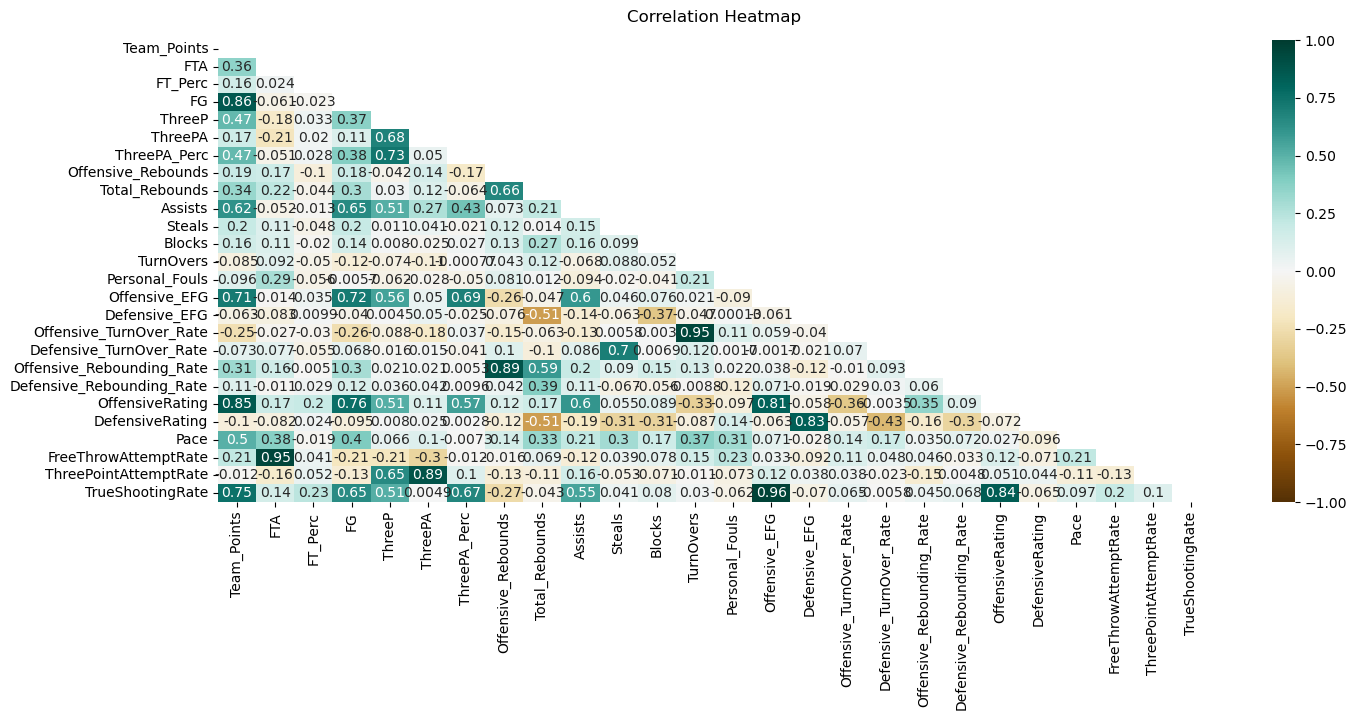

In [18]:
# Plotting our baseline Feature correlation Heatmap
# creating mask 
mask = np.triu(np.ones_like(Merged_df.corr())) 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(Merged_df.corr(),mask = mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=13);

In [21]:
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(Merged_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
       'Team_Points',  'FTA', 'FT_Perc',
       'FG',  'ThreeP', 'ThreePA', 'ThreePA_Perc',
       'Offensive_Rebounds', 'Total_Rebounds', 'Assists', 'Steals', 'Blocks',
       'TurnOvers', 'Personal_Fouls', 'Offensive_EFG',
       'Defensive_EFG', 'Offensive_TurnOver_Rate', 'Defensive_TurnOver_Rate',
       'Offensive_Rebounding_Rate', 'Defensive_Rebounding_Rate',
       'OffensiveRating', 'DefensiveRating', 'Pace', 'FreeThrowAttemptRate',
       'ThreePointAttemptRate', 'TrueShootingRate'])

Text(0.5, 0, 'Offensive Rating')

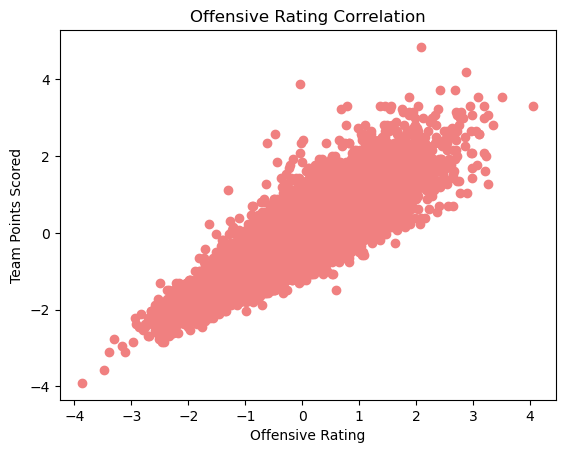

In [23]:
x = df_scaled['OffensiveRating']
y = df_scaled['Team_Points']
plt.scatter(x, y, color = 'lightcoral')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Offensive Rating Correlation')
plt.ylabel('Team Points Scored')
plt.xlabel('Offensive Rating')


Text(0.5, 0, 'Pace')

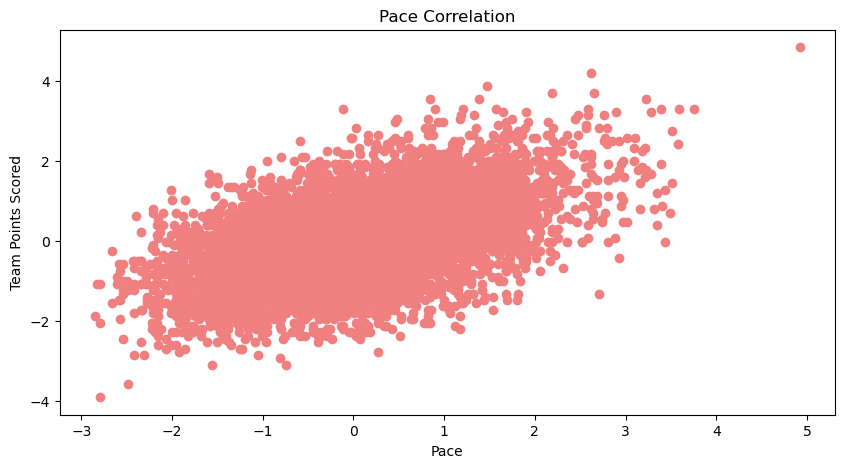

In [25]:
x = df_scaled['Pace']
y = df_scaled['Team_Points']
plt.scatter(x, y, color = 'lightcoral')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Pace Correlation')
plt.ylabel('Team Points Scored')
plt.xlabel('Pace')

Text(0.5, 0, 'True Shooting %')

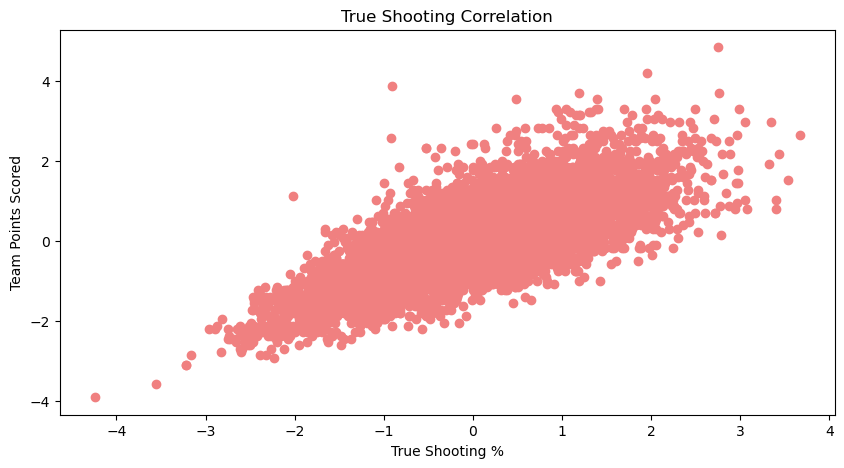

In [27]:
x = df_scaled['TrueShootingRate']
y = df_scaled['Team_Points']
plt.scatter(x, y, color = 'lightcoral')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('True Shooting Correlation')
plt.ylabel('Team Points Scored')
plt.xlabel('True Shooting %')

Text(0.5, 0, 'Offensive eFG%')

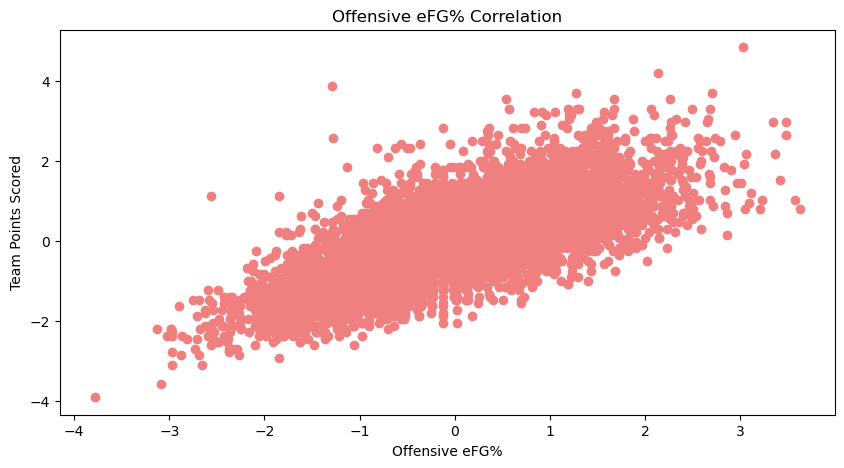

In [29]:
x = df_scaled['Offensive_EFG']
y = df_scaled['Team_Points']
plt.scatter(x, y, color = 'lightcoral')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Offensive eFG% Correlation')
plt.ylabel('Team Points Scored')
plt.xlabel('Offensive eFG%')

Text(0.5, 0, 'Offensive_TurnOver_Rate')

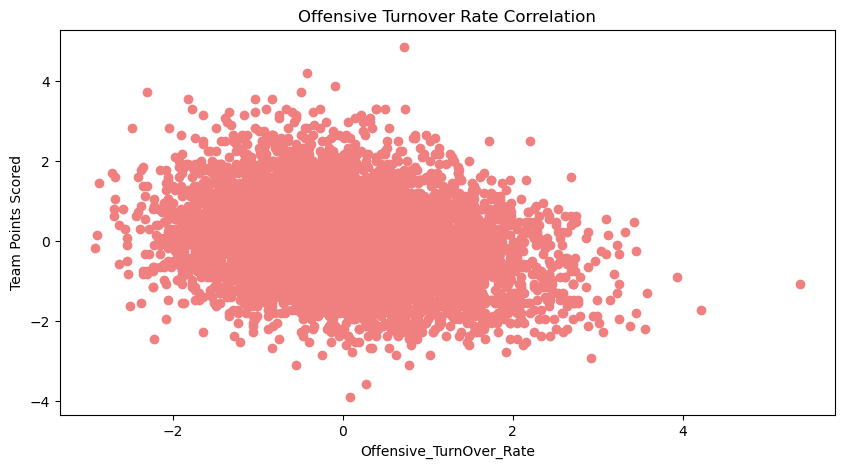

In [31]:
x = df_scaled['Offensive_TurnOver_Rate']
y = df_scaled['Team_Points']
plt.scatter(x, y, color = 'lightcoral')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Offensive Turnover Rate Correlation')
plt.ylabel('Team Points Scored')
plt.xlabel('Offensive_TurnOver_Rate')

## Analysis #2 - Adding Opposing Team Defensive Metrics

In [7]:
# Loading our combined dataset
Merged_dfTest2 = pd.read_excel('../HistoricalTrainingData/combinedTeamBoxScoreGameLogHistory.xlsx')

In [9]:
Merged_dfTest2 = Merged_dfTest2[[
    'Date',
    'Season',
    'Team',
    'Location',
    'Opponent',
    'Team_Points',
    'OffensiveRating',
    'Pace',
    'TrueShootingRate',
    'Offensive_EFG',
    'Offensive_TurnOver_Rate',
    'DefensiveRating',
    'Defensive_EFG'
      ]]

In [61]:
Merged_dfTest2['KEY_TEAM_ONE'] = Merged_dfTest2['Date'] + Merged_dfTest2['Team'] + Merged_dfTest2['Opponent']

In [11]:
Merged_dfTest2VS = Merged_dfTest2[Merged_dfTest2['Location'] == 'VS']
Merged_dfTest2VS['Opponent-Stats-Key'] = Merged_dfTest2VS['Date'] + Merged_dfTest2VS['Opponent']
Merged_dfTest2VS['Team-Stats-Key'] = Merged_dfTest2VS['Date'] + Merged_dfTest2VS['Team']

C:\Users\tommo\AppData\Local\Temp\ipykernel_4040\2446700664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merged_dfTest2VS['Opponent-Stats-Key'] = Merged_dfTest2VS['Date'] + Merged_dfTest2VS['Opponent']
C:\Users\tommo\AppData\Local\Temp\ipykernel_4040\2446700664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merged_dfTest2VS['Team-Stats-Key'] = Merged_dfTest2VS['Date'] + Merged_dfTest2VS['Team']


In [13]:
Merged_dfTest2AT = Merged_dfTest2[Merged_dfTest2['Location'] == '@']
Merged_dfTest2AT['Opponent-Stats-Key'] = Merged_dfTest2AT['Date'] + Merged_dfTest2AT['Opponent']
Merged_dfTest2AT['Team-Stats-Key'] = Merged_dfTest2AT['Date'] + Merged_dfTest2AT['Team']

C:\Users\tommo\AppData\Local\Temp\ipykernel_4040\3975759968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merged_dfTest2AT['Opponent-Stats-Key'] = Merged_dfTest2AT['Date'] + Merged_dfTest2AT['Opponent']
C:\Users\tommo\AppData\Local\Temp\ipykernel_4040\3975759968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merged_dfTest2AT['Team-Stats-Key'] = Merged_dfTest2AT['Date'] + Merged_dfTest2AT['Team']


In [15]:
Merged_dfTest2VS[Merged_dfTest2VS['Team']=='north-carolina']

,Date,Season,Team,Location,Opponent,Team_Points,OffensiveRating,Pace,TrueShootingRate,Offensive_EFG,Offensive_TurnOver_Rate,DefensiveRating,Defensive_EFG,Opponent-Stats-Key,Team-Stats-Key
0,2014-11-14,2015,north-carolina,VS,North Carolina Central,76.0,102.0,74.5,0.505,0.459,15.7,80.5,0.366,2014-11-14North Carolina Central,2014-11-14north-carolina
1,2014-11-16,2015,north-carolina,VS,Robert Morris,103.0,132.3,77.9,0.585,0.535,8.3,75.8,0.410,2014-11-16Robert Morris,2014-11-16north-carolina
6,2014-12-03,2015,north-carolina,VS,Iowa,55.0,83.0,66.2,0.361,0.309,11.6,90.6,0.355,2014-12-03Iowa,2014-12-03north-carolina
7,2014-12-07,2015,north-carolina,VS,East Carolina,108.0,138.9,77.7,0.632,0.607,8.6,82.3,0.362,2014-12-07East Carolina,2014-12-07north-carolina
11,2014-12-27,2015,north-carolina,VS,UAB,89.0,113.4,78.5,0.596,0.558,19.4,73.9,0.331,2014-12-27UAB,2014-12-27north-carolina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2024-02-06,2024,north-carolina,VS,Clemson,76.0,104.6,72.7,0.494,0.438,7.2,110.1,0.478,2024-02-06Clemson,2024-02-06north-carolina
350,2024-02-17,2024,north-carolina,VS,Virginia Tech,96.0,127.6,75.2,0.608,0.566,10.2,107.7,0.470,2024-02-17Virginia Tech,2024-02-17north-carolina
352,2024-02-26,2024,north-carolina,VS,Miami (FL),75.0,101.9,73.6,0.528,0.516,13.4,96.5,0.508,2024-02-26Miami (FL),2024-02-26north-carolina
353,2024-03-02,2024,north-carolina,VS,NC State,79.0,115.0,68.7,0.600,0.528,9.6,101.9,0.492,2024-03-02NC State,2024-03-02north-carolina


In [25]:

Merged_dfTest2AT[Merged_dfTest2AT['Team']=='clemson']

,Date,Season,Team,Location,Opponent,Team_Points,OffensiveRating,Pace,TrueShootingRate,Offensive_EFG,Offensive_TurnOver_Rate,DefensiveRating,Defensive_EFG,Opponent-Stats-Key,Team-Stats-Key
2039,2014-12-19,2015,clemson,@,South Carolina,45.0,69.1,65.1,0.359,0.333,17.2,104.5,0.530,2014-12-19South Carolina,2014-12-19clemson
2043,2015-01-07,2015,clemson,@,Louisville,52.0,85.6,60.8,0.433,0.375,18.9,95.5,0.382,2015-01-07Louisville,2015-01-07clemson
2044,2015-01-10,2015,clemson,@,Pitt,71.0,123.4,57.5,0.587,0.549,11.7,107.8,0.434,2015-01-10Pitt,2015-01-10clemson
2045,2015-01-13,2015,clemson,@,Virginia,42.0,77.8,54.0,0.436,0.393,18.6,120.5,0.600,2015-01-13Virginia,2015-01-13clemson
2049,2015-01-28,2015,clemson,@,NC State,68.0,104.2,65.2,0.548,0.528,16.2,87.4,0.333,2015-01-28NC State,2015-01-28clemson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,2024-02-06,2024,clemson,@,UNC,80.0,110.1,72.7,0.516,0.478,6.1,104.6,0.438,2024-02-06UNC,2024-02-06clemson
2338,2024-02-10,2024,clemson,@,Syracuse,77.0,108.2,71.2,0.673,0.667,26.9,95.6,0.445,2024-02-10Syracuse,2024-02-10clemson
2341,2024-02-21,2024,clemson,@,Georgia Tech,81.0,130.3,62.2,0.660,0.655,6.1,91.7,0.358,2024-02-21Georgia Tech,2024-02-21clemson
2344,2024-03-02,2024,clemson,@,Notre Dame,62.0,91.0,68.2,0.472,0.432,9.6,101.2,0.509,2024-03-02Notre Dame,2024-03-02clemson


In [23]:
Merged_dfTest2AT['Team'].unique()

array(['north-carolina', 'duke', 'north-carolina-state', 'virginia',
       'wake-forest', 'maryland', 'clemson', 'georgia-tech',
       'florida-state', 'miami-fl', 'virginia-tech', 'boston-college',
       'syracuse', 'south-carolina', 'notre-dame', 'pittsburgh',
       'louisville', 'southern-methodist', 'stanford', 'california',
       'boston-university', 'houston', 'northwestern'], dtype=object)

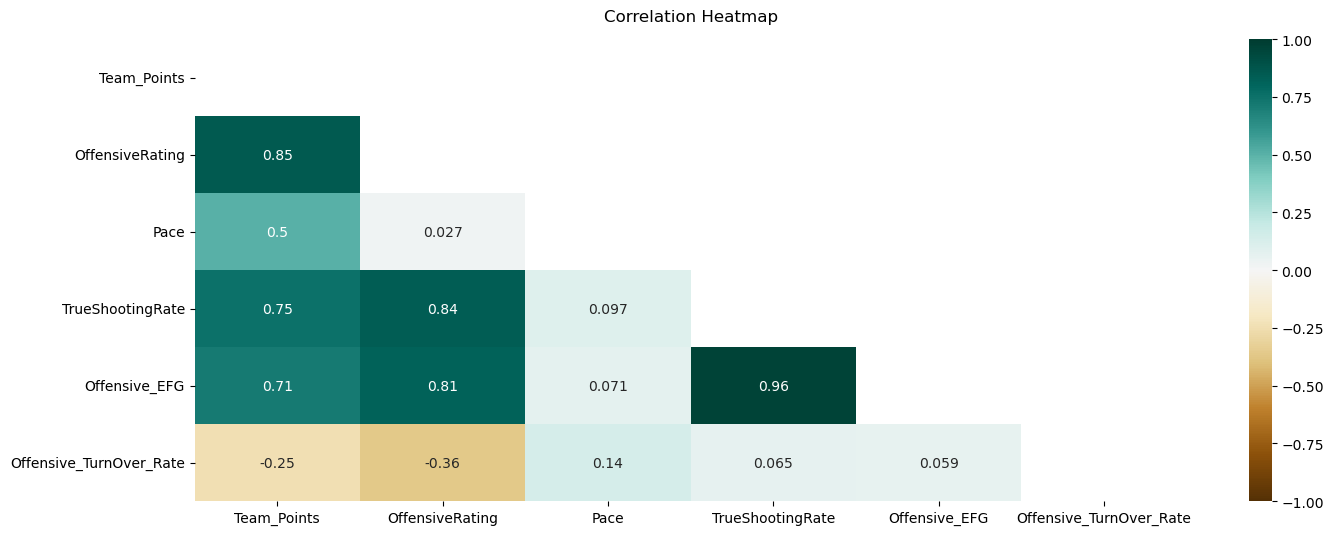

In [45]:
# Plotting our baseline Feature correlation Heatmap
# creating mask 
Merged_dfTest2CORR = Merged_dfTest2[[
   
    'Team_Points',
    'OffensiveRating',
    'Pace',
    'TrueShootingRate',
    'Offensive_EFG',
    'Offensive_TurnOver_Rate'
      ]]
mask = np.triu(np.ones_like(Merged_dfTest2CORR.corr())) 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(Merged_dfTest2CORR.corr(),mask = mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=13);